In [27]:
# !pip install xgboost
# !pip install matplotlib
# !pip install sklearn
# !pip install tensorflow
# !pip install keras

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from functions.plot_learning_curve import plot_learned
from functions.chronometer import check_time
from functions.grid_search import grid_search

***
# =-=-=-=-=-=-=-=-=-= SETAR DATA E RODOVIA =-=-=-=-=-=-=-=-=-=

In [29]:
train_data = '2020-01-07'
eval_data  = '2020-01-07'
rodovia = 'dutra'

***
* Functions 

* scores_model

In [30]:
def scores_model(model, X, y, y_test, preds):
    # Multiply by -1 since sklearn calculates *negative* MAE
    scores = -1 * cross_val_score(model, X, y,
                                  cv=5,
                                  scoring='neg_mean_absolute_error')

    print("Scores:\n", scores)
    print()
    print("Average score (across experiments):")
    print(scores.mean())
    print()
    print('MAE:', mean_absolute_error(y_test, preds))
    print()
    plot_learned(model)

***
* Leituras geradas a partir da base de dados

In [31]:
df_train = pd.read_csv('../outputs_' + train_data + '/' + rodovia + '/leituras_' + rodovia + '_all_days.csv', delimiter=',')
# df_train

***
# Definição de Features e Target

* Features

Os dados dos ultimos 7 dias

In [32]:
features = ['7_days_esp_00h_06hs'  , '7_days_esp_06_12hs'  , '7_days_esp_12_18'  , '7_days_esp_18_24hs',   \
            '6_days_esp_00h_06hs'  , '6_days_esp_06_12hs'  , '6_days_esp_12_18'  , '6_days_esp_18_24hs',   \
            '5_days_esp_00h_06hs'  , '5_days_esp_06_12hs'  , '5_days_esp_12_18'  , '5_days_esp_18_24hs',   \
            '4_days_esp_00h_06hs'  , '4_days_esp_06_12hs'  , '4_days_esp_12_18'  , '4_days_esp_18_24hs',   \
            '3_days_esp_00h_06hs'  , '3_days_esp_06_12hs'  , '3_days_esp_12_18'  , '3_days_esp_18_24hs',   \
            '2_days_esp_00h_06hs'  , '2_days_esp_06_12hs'  , '2_days_esp_12_18'  , '2_days_esp_18_24hs',   \
            '1_day_esp_00h_06hs'   , '1_day_esp_06_12hs'   , '1_day_esp_12_18'   , '1_day_esp_18_24hs']

X = df_train[features]
# X

* Target

In [33]:
target = ['esp_00h_06hs', 'esp_06_12hs', 'esp_12_18', 'esp_18_24hs']

y = df_train[target]

* train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.4,
                                                    random_state=42)

***

* Set Model

In [35]:
# model = DecisionTreeClassifier(random_state=42)
model = RandomForestClassifier()
# model = ExtraTreeClassifier()
# model = ExtraTreesClassifier()
# model = KNeighborsClassifier()

* Fit

In [36]:
model.fit(X_train, y_train)

RandomForestClassifier()

* Grid Search

In [37]:
# grid_search(X_train, X_test, y_train, y_test, model_rf)

* Predict

In [38]:
preds = model.predict(X_test)

***
# Multioutput-multiclass classification (also known as multitask classification)
https://scikit-learn.org/stable/modules/multiclass.html


* Metrics DecisionTreeClassifier

Scores:
 [0.24691358 0.0462963  0.03703704 0.040625   0.15625   ]

Average score (across experiments):
0.1054243827160494

MAE: 0.16975308641975306



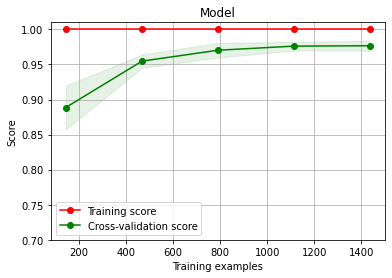

In [39]:
scores_model(model, X, y, y_test, preds)

***
# Make predictions

In [40]:
df_eval = pd.read_csv('../outputs_' + eval_data + '/' + rodovia + '/leituras_' + rodovia + '_all_days.csv', delimiter=',')
# test

In [41]:
X_eval = df_eval[features]

y_eval = df_eval[target]

In [42]:
eval_preds = model.predict(X_eval)

In [43]:
eval_preds[9]

array([0, 2, 3, 1], dtype=int64)

In [44]:
eval_preds[392]

array([0, 2, 3, 1], dtype=int64)

* Metrics for predictions

Scores:
 [0.22530864 0.0462963  0.04012346 0.040625   0.159375  ]

Average score (across experiments):
0.10234567901234567

MAE: 0.07320099255583126



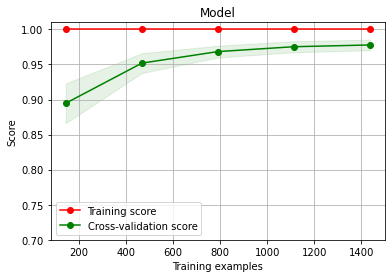

In [45]:
scores_model(model, X_eval, y_eval, y_eval, eval_preds)

***
# Output predicted CSV

In [46]:
predicted_reads = pd.DataFrame({
                                 'Id'           : df_eval['Id'].astype(str),
                                 'state'        : df_eval['State'],
                                 'km'           : df_eval['KM'].astype(str),
                                 'esp_00h_06hs' : eval_preds[:, 0],
                                 'esp_06_12hs'  : eval_preds[:, 1],
                                 'esp_12_18'    : eval_preds[:, 2],
                                 'esp_18_24hs'  : eval_preds[:, 3]
                               })
predicted_reads.to_csv('../outputs_' + eval_data + '/' + rodovia + '/predicted_' + rodovia + '_ml.csv', index=False)
print(predicted_reads.to_string())
# predicted_reads

      Id state   km  esp_00h_06hs  esp_06_12hs  esp_12_18  esp_18_24hs
0      1    SP  232             0            0          0            0
1      2    SP  231             0            0          0            0
2      3    SP  230             0            0          2            0
3      4    SP  229             0            0          0            0
4      5    SP  228             0            1          2            0
5      6    SP  227             0            0          0            0
6      7    SP  226             0            0          0            0
7      8    SP  225             0            0          0            0
8      9    SP  224             0            0          0            0
9     10    SP  223             0            2          3            1
10    11    SP  222             0            0          0            0
11    12    SP  221             0            0          0            0
12    13    SP  220             0            0          0            0
13    

In [47]:
# print(predicted_reads.to_string())

In [48]:
predicted_reads.describe()

,esp_00h_06hs,esp_06_12hs,esp_12_18,esp_18_24hs
count,403.000000,403.000000,403.000000,403.000000
mean,0.014888,0.049628,0.121588,0.054591
std,0.121257,0.303411,0.608894,0.348411
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,3.000000,7.000000,4.000000


In [49]:
predicted_reads.iloc[9]

Id               10
state            SP
km              223
esp_00h_06hs      0
esp_06_12hs       2
esp_12_18         3
esp_18_24hs       1
Name: 9, dtype: object

In [50]:
df_train.iloc[9][-4:]

esp_12_18      15
esp_18_24hs    23
day_total      66
Fator_X         3
Name: 9, dtype: object

In [51]:
df_eval.iloc[9][-4:]

esp_12_18      15
esp_18_24hs    23
day_total      66
Fator_X         3
Name: 9, dtype: object

***

In [52]:
predicted_reads.iloc[392]

Id              393
state            RJ
km              174
esp_00h_06hs      0
esp_06_12hs       2
esp_12_18         3
esp_18_24hs       1
Name: 392, dtype: object

In [53]:
df_train.iloc[392][-4:]

esp_12_18       6
esp_18_24hs     7
day_total      21
Fator_X         3
Name: 392, dtype: object

In [54]:
df_eval.iloc[392][-4:]

esp_12_18       6
esp_18_24hs     7
day_total      21
Fator_X         3
Name: 392, dtype: object